## Data description

### Kaggle description

Bank marketing campaigns dataset analysis # Opening a Term Deposit
It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Sourse of the data
https://archive.ics.uci.edu/ml/datasets/bank+marketing

Citation Request:

This dataset is public available for research. The details are described in S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Title: Bank Marketing (with social/economic context)

Sources
Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014

Past Usage:

The full dataset (bank-additional-full.csv) was described and analyzed in:

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.

Relevant Information:

This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns).
Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")

The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

Number of Instances: 41188 for bank-additional-full.csv

Number of Attributes: 20 + output attribute.

Attribute information:

For more information, read [Moro et al., 2014].

Input variables:

bank client data:
*1 - age (numeric)

*2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

*3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

*4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: "cellular","telephone")
*9 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

*10 - dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

*11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:
*12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

*13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*14 - previous: number of contacts performed before this campaign and for this client (numeric)

1515 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

social and economic context attributes
*16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

*17 - cons.price.idx: consumer price index - monthly indicator (numeric)

*18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

*19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.

### Additional information from <a href="https://core.ac.uk/download/pdf/55631291.pdf">*A Data-Driven Approach to Predict the Success of Bank Telemarketing*</a>


- Data collected from May 2008 to June 2013, thus including the effects of the recent financial crisis.
- Authors analized 150 features, using semi-automatic selection method settled upon 22. 
- Two knowledge extraction methods, a sensitivity analysis and a DT, were applied
to the NN model and revealed several key attributes (e.g., Euribor rate, direction
of the call and bank agent experience)
- It should be stressed that the task of selecting the best set of clients, i.e., that are more
likely to subscribe a product, is considered NP-hard
- Outbound calls are more intrusive
- Inbound calls refer to client calling a bank for some reason and is offered opening a deposit
- 52944 records of data
- Train data till June 2012, 51651 examples
- Test data from July 2012 to June 2013
- Authors tested logistic regression, decision trees, neural network, suppor vector machine.
- Hyperparameter heuristics and grip search
- ROC
- AUC independent of class frequency (ideal AUC is 1.0, random 0.5)
- ALIFT - area under LIFT curve
- random split of the data into training and validation sets (2/3 and 1/3)
- Mann-Whitney non-parametric test is used to check statistical significance at the 95% confidence level.
- Client behavious may change over time, is it the case here - 2008 financial crisis could be relevant
- Rolling windows evaluation scheme, as a solution
- Feature selection using automatic methods and problem domain knowledge
- In the paper: business intuitive knowledge to test a set of hypotheses 
 - ... MORE

### Overview

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [336]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

In [337]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## General

### Is this dataset balanced?

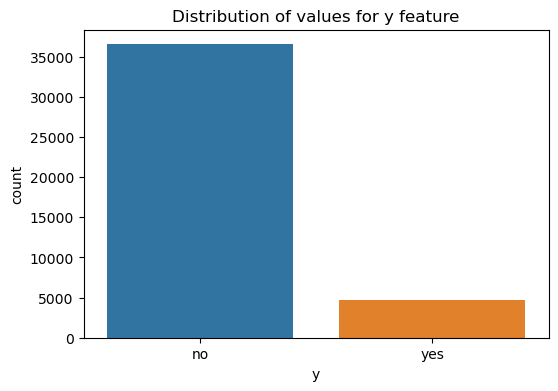

In [339]:
fig, ax = plt.subplots(figsize=[6, 4])
sns.countplot(data=df, x="y")
ax.set_title("Distribution of values for y feature")
plt.show()

In [340]:
total = df.groupby("y")["y"].count()
no, yes = total[0], total[1]
yes/(no+yes)

0.11265417111780131

In [341]:
yes, no

(4640, 36548)

The dataset is not balanced only 11% containts positive records.

### Overview of distributions

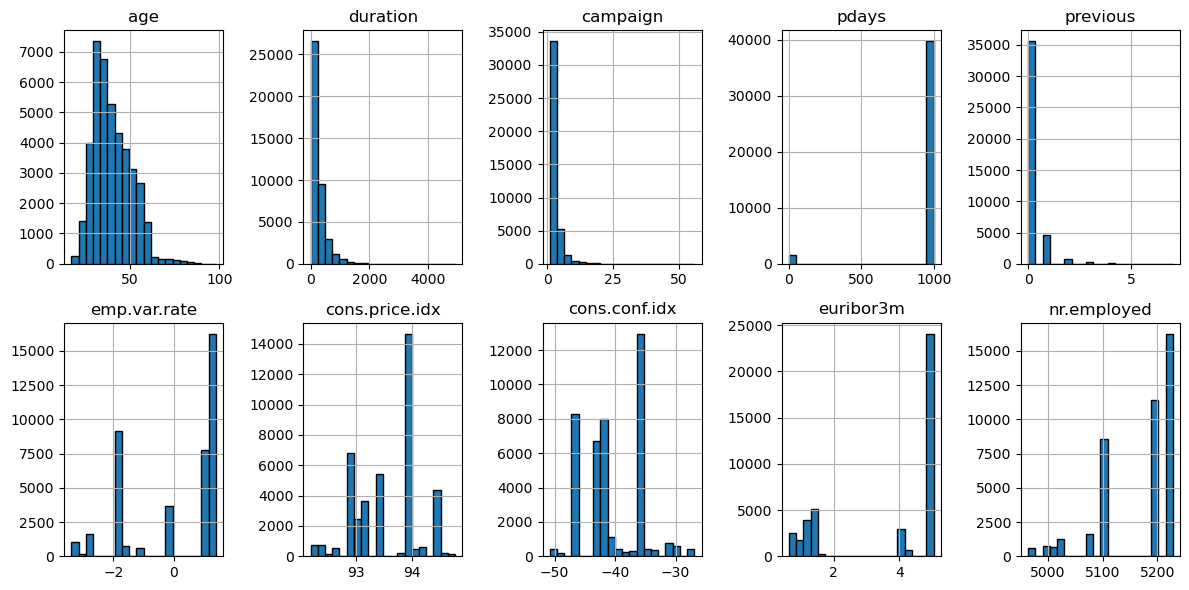

In [342]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=20, figsize=(12, 6), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

### Correlations

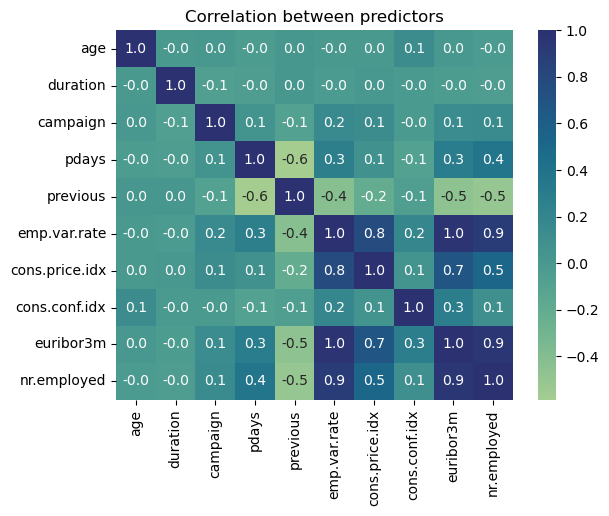

In [343]:
corr_matrix = df.corr(numeric_only=True)
heatmap = sns.heatmap(corr_matrix, cmap="crest", annot=True, fmt=".1f")
heatmap.set(title="Correlation between predictors")
plt.show()

In [344]:
df_num = pd.get_dummies(df, drop_first=False)

In [345]:
df_num

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


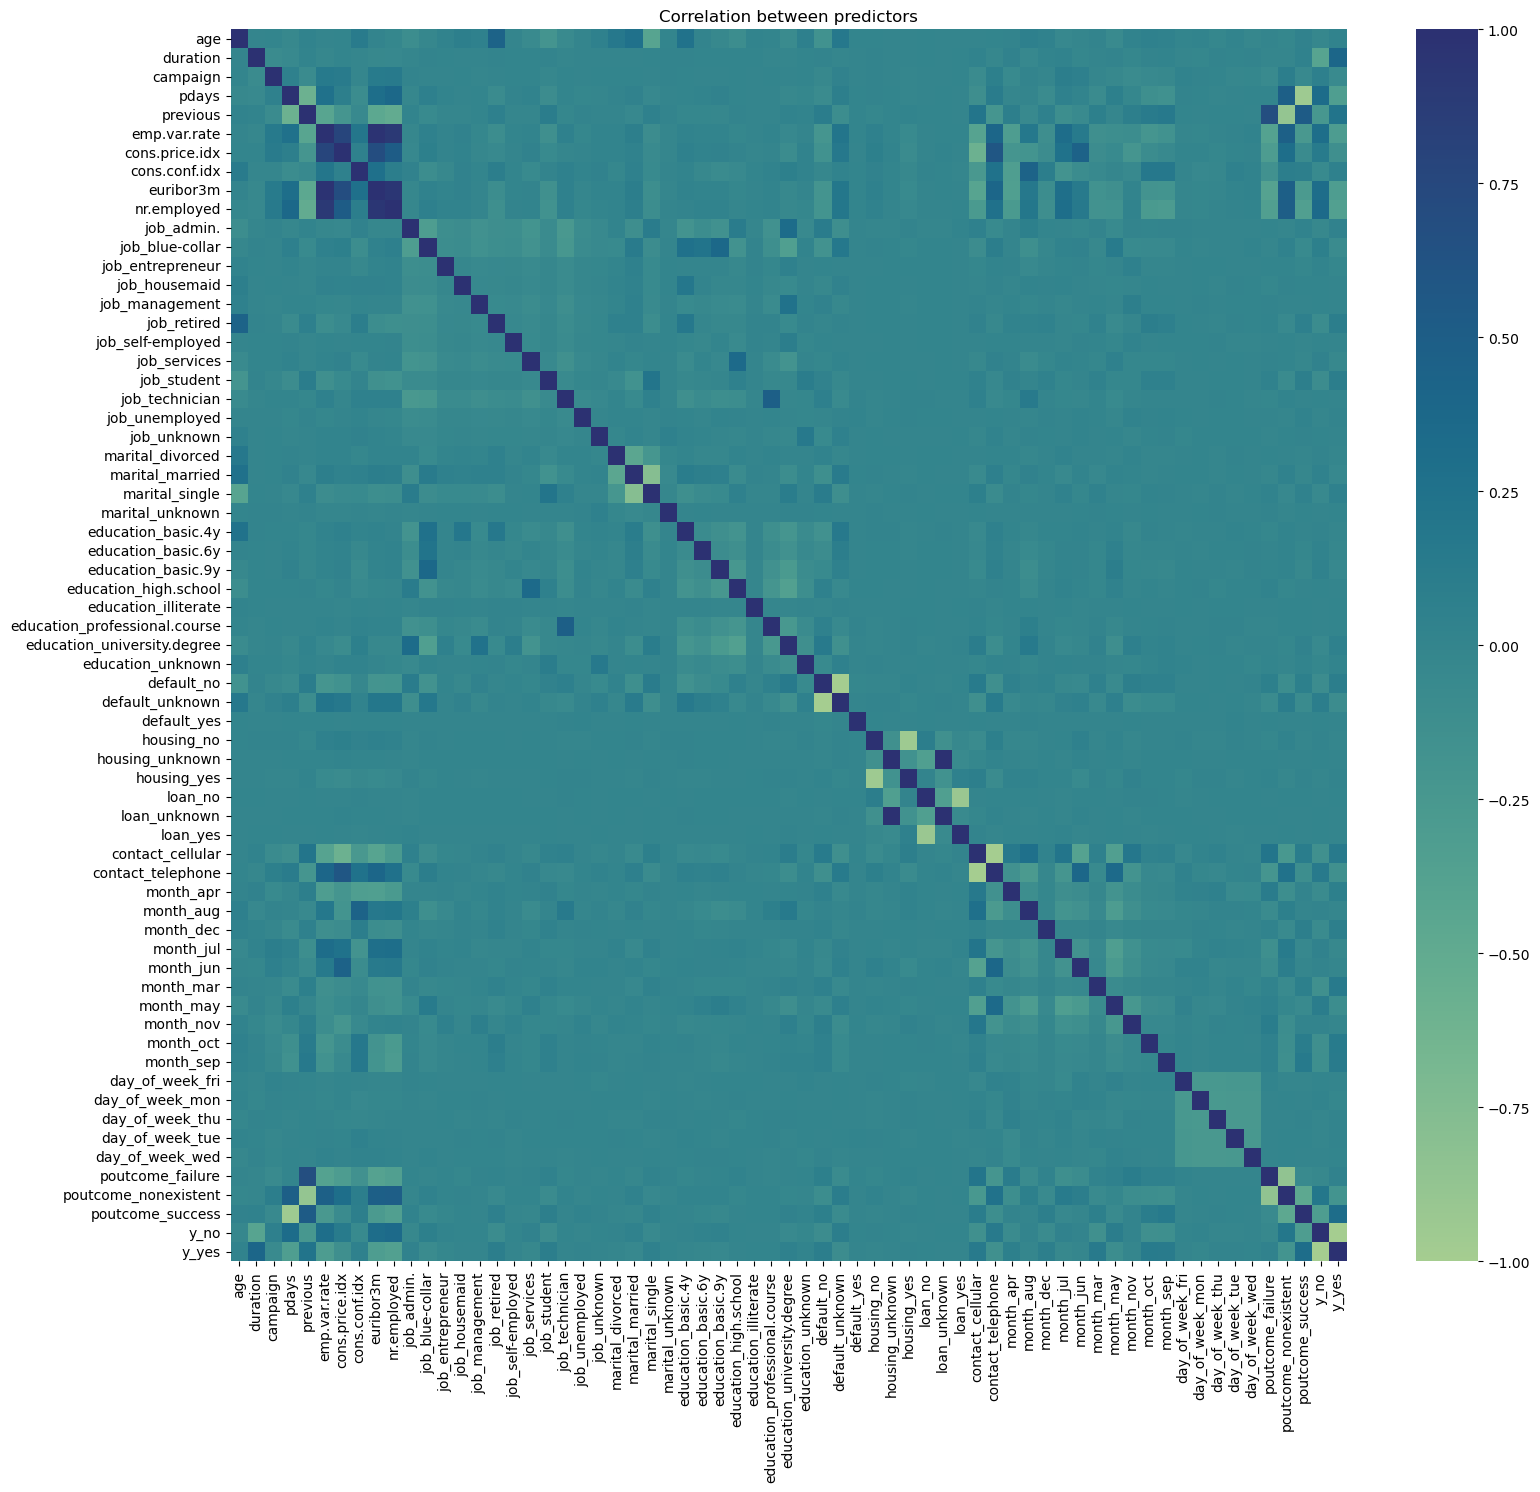

In [346]:
fig, ax = plt.subplots(figsize=(18, 16))
corr_matrix = df_num.corr(numeric_only=True)
heatmap = sns.heatmap(corr_matrix, cmap="crest", annot=False, fmt=".1f")
heatmap.set(title="Correlation between predictors")
plt.show()

## Age

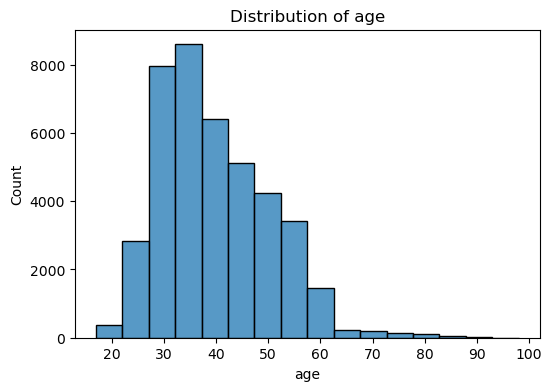

In [347]:
fig, ax = plt.subplots(figsize=[6,4])
sns.histplot(data=df, x='age', bins=16)
plt.title("Distribution of age")
plt.show()

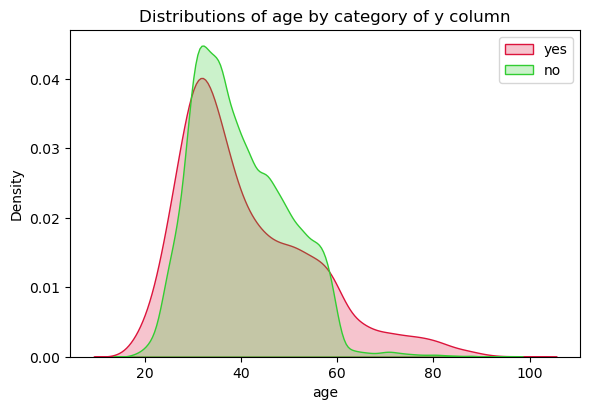

In [348]:
# KDE plots for each subset - one containng records in y column with "yes", other with "no"
# The plots are not w.r.t. the whole dataset since it is unbalanced
fig, ax = plt.subplots(figsize=(6, 4))
sns.kdeplot(data=df[df["y"]=="yes"], x='age', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='age',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()

plt.title("Distributions of age by category of y column")
plt.show()

### What preferences of yes/no is there by age? 

In [349]:
x = df.groupby(["age", "y"])["y"].count().unstack(fill_value=0).stack()
x

age  y  
17   no      3
     yes     2
18   no     16
     yes    12
19   no     22
            ..
94   yes     0
95   no      1
     yes     0
98   no      0
     yes     2
Length: 156, dtype: int64

In [350]:
x.info()

<class 'pandas.core.series.Series'>
MultiIndex: 156 entries, (17, 'no') to (98, 'yes')
Series name: None
Non-Null Count  Dtype
--------------  -----
156 non-null    int64
dtypes: int64(1)
memory usage: 4.4+ KB


In [351]:
x

age  y  
17   no      3
     yes     2
18   no     16
     yes    12
19   no     22
            ..
94   yes     0
95   no      1
     yes     0
98   no      0
     yes     2
Length: 156, dtype: int64

In [352]:
x = x.reset_index()
x.head()

,age,y,0
0,17,no,3
1,17,yes,2
2,18,no,16
3,18,yes,12
4,19,no,22


In [353]:
x.columns = ['age', 'y', 'count']
x

,age,y,count
0,17,no,3
1,17,yes,2
2,18,no,16
3,18,yes,12
4,19,no,22
...,...,...,...
151,94,yes,0
152,95,no,1
153,95,yes,0
154,98,no,0


In [354]:
x = x.pivot_table(values='count', index=x.age, columns=['y'], aggfunc='first').reset_index()
x

y,age,no,yes
0,17,3,2
1,18,16,12
2,19,22,20
3,20,42,23
4,21,73,29
...,...,...,...
73,91,2,0
74,92,1,3
75,94,1,0
76,95,1,0


In [355]:
x["ratio"] = x["yes"]/(x["yes"] + x["no"])
x

y,age,no,yes,ratio
0,17,3,2,0.400000
1,18,16,12,0.428571
2,19,22,20,0.476190
3,20,42,23,0.353846
4,21,73,29,0.284314
...,...,...,...,...
73,91,2,0,0.000000
74,92,1,3,0.750000
75,94,1,0,0.000000
76,95,1,0,0.000000


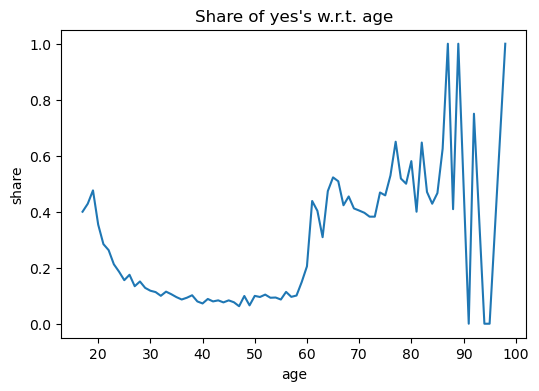

In [356]:
fig, ax = plt.subplots(figsize=[6, 4])
sns.lineplot(data=x, x="age", y="ratio")
ax.set_title("Share of yes's w.r.t. age")
ax.set_ylabel("share")
plt.show()

In [357]:
table = x
table["error"] = 1/table["yes"]
table = table[table.error < 2]
table

y,age,no,yes,ratio,error
0,17,3,2,0.400000,0.500000
1,18,16,12,0.428571,0.083333
2,19,22,20,0.476190,0.050000
3,20,42,23,0.353846,0.043478
4,21,73,29,0.284314,0.034483
...,...,...,...,...,...
70,87,0,1,1.000000,1.000000
71,88,13,9,0.409091,0.111111
72,89,0,2,1.000000,0.500000
74,92,1,3,0.750000,0.333333


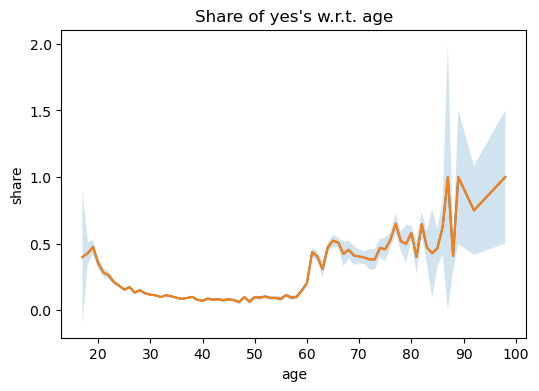

In [358]:
fig, ax = plt.subplots(figsize=[6, 4])
ax.plot(table["age"], table["ratio"], '-')
ax.fill_between(table["age"], table["ratio"] - table["error"], table["ratio"] + table["error"], alpha=0.2)
ax.set_ylabel("share")
ax.set_xlabel("age")
ax.set_title("Share of yes's w.r.t. age")
ax.plot(table["age"], table["ratio"])
plt.show()

Blue regions are only to indicate the uncertainty, the fewer people with certain age the less certain the observation. It is estimated by 1 over the sum number of responses yes's and no's. The only conclusion is that age between 25 and 60 does not play any role in the prediction. 

## Job

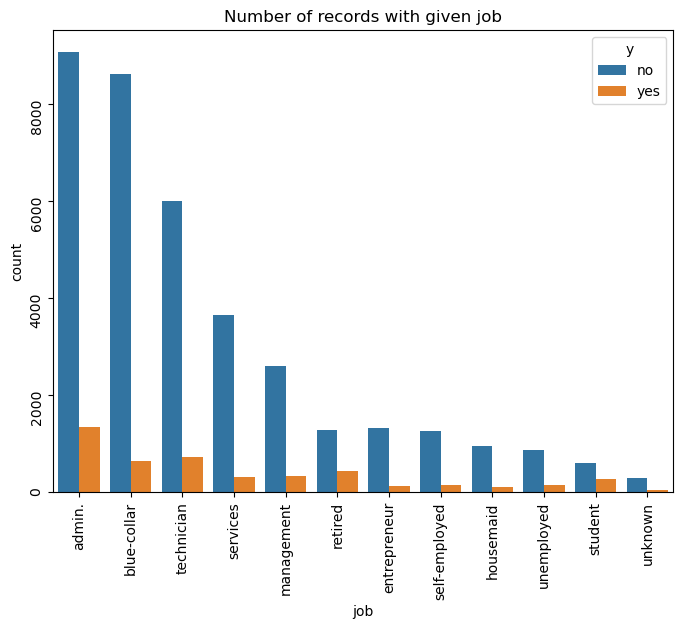

In [359]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.countplot(data=df, x="job", order=df["job"].value_counts().index, hue="y")
ax.tick_params(labelrotation=90)
ax.set_title("Number of records with given job")
plt.show()

## Marital

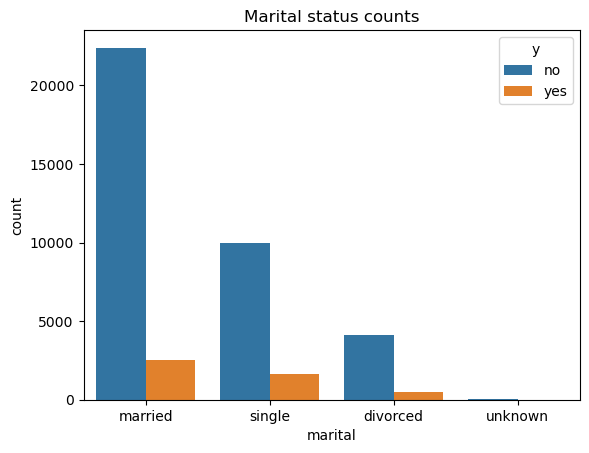

In [360]:
fix, ax = plt.subplots()
sns.countplot(data=df, x="marital", hue="y")
ax.set_title("Marital status counts")
plt.show()

## Education

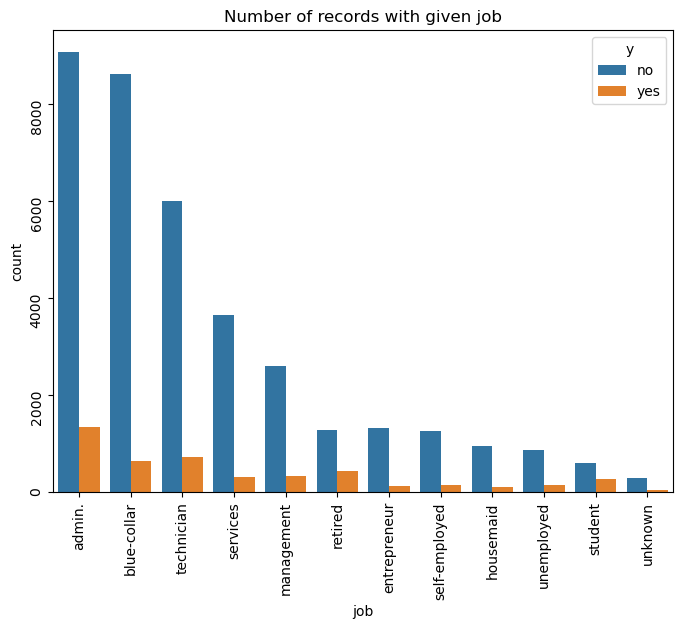

In [361]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.countplot(data=df, x="job", order=df["job"].value_counts().index, hue="y")
ax.tick_params(labelrotation=90)
ax.set_title("Number of records with given job")
plt.show()

## Default

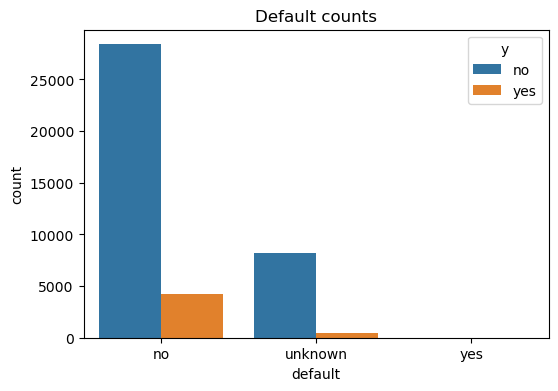

In [362]:
fig, ax = plt.subplots(figsize=[6, 4])
sns.countplot(data=df, x="default", hue="y")
ax.set_title("Default counts")
plt.show()

A lot of missing values. No records for yes's makes this feature considerably less usefull. Potentially it is going to be dropped. However, there might be a tendency not to tell about a default - it is negative, client hesitant to tell this information. The way data for this feature is gathered is importnat to detemine if such tendency exists.

## Housing

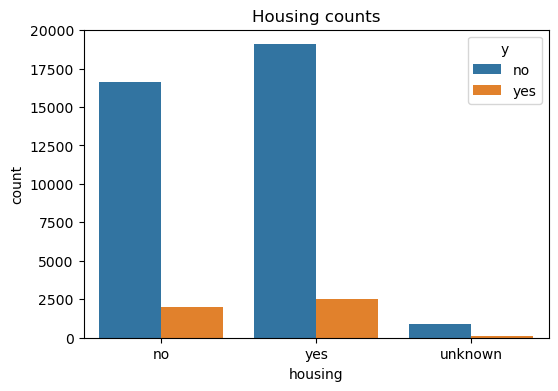

In [363]:
fig, ax = plt.subplots(figsize=[6, 4])
sns.countplot(data=df, x="housing", hue="y")
ax.set_title("Housing counts")
plt.show()

## Loan

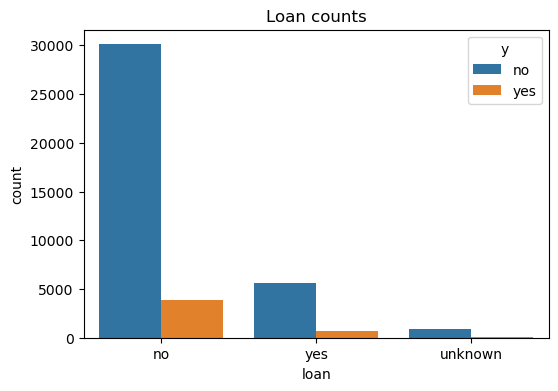

In [364]:
fig, ax = plt.subplots(figsize=[6, 4])
sns.countplot(data=df, x="loan", hue="y")
ax.set_title("Loan counts")
plt.show()

## Means of contact

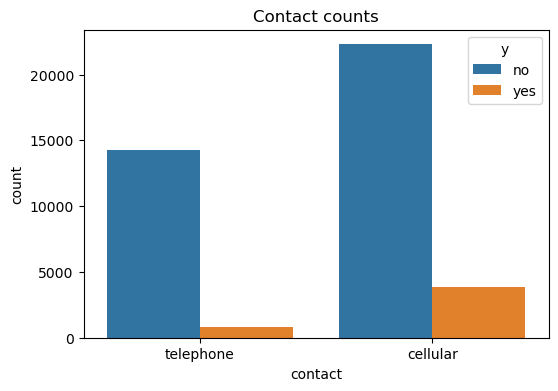

In [365]:
fig, ax = plt.subplots(figsize=[6, 4])
sns.countplot(data=df, x="contact", hue="y")
ax.set_title("Contact counts")
plt.show()

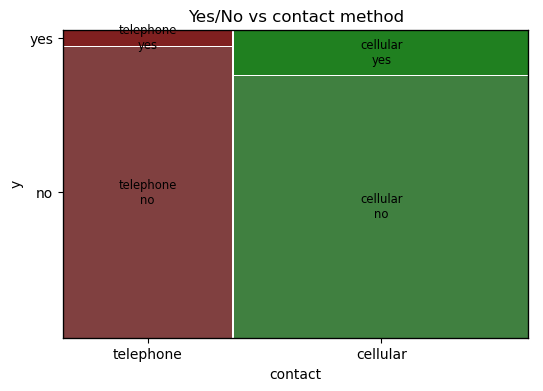

In [366]:
from statsmodels.graphics.mosaicplot import mosaic
df_to_plot = df[["contact", "y"]]
df["y"] = df["y"].replace(1, "yes").replace(0, "no")
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel("contact")
ax.set_ylabel("y")
mosaic(data=df, index=["contact", "y"], title="Yes/No vs contact method", ax=ax)
plt.show()

Cellular has higher yes's to no's ratio, however a small one and could be because of older age of people using telephones. Cellular is slightly preferred way of contact.

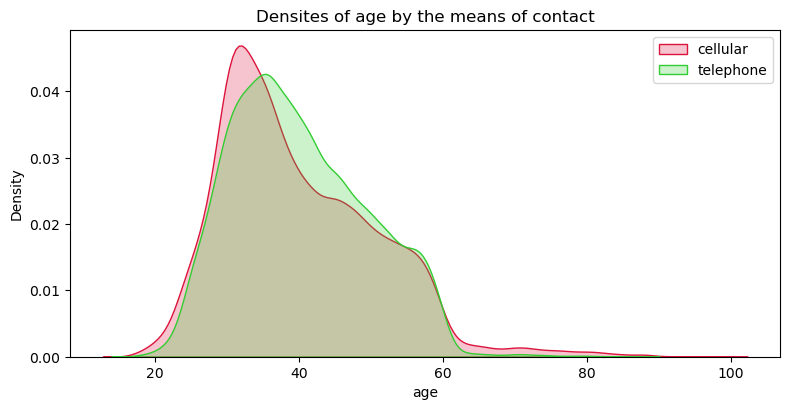

In [367]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.kdeplot(data=df[df["contact"]=="cellular"], x='age', 
            color='crimson', label='cellular', fill=True, ax=ax)
sns.kdeplot(data=df[df["contact"]=="telephone"], x='age',
            color='limegreen', label='telephone', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Densites of age by the means of contact")
plt.show()

## Month

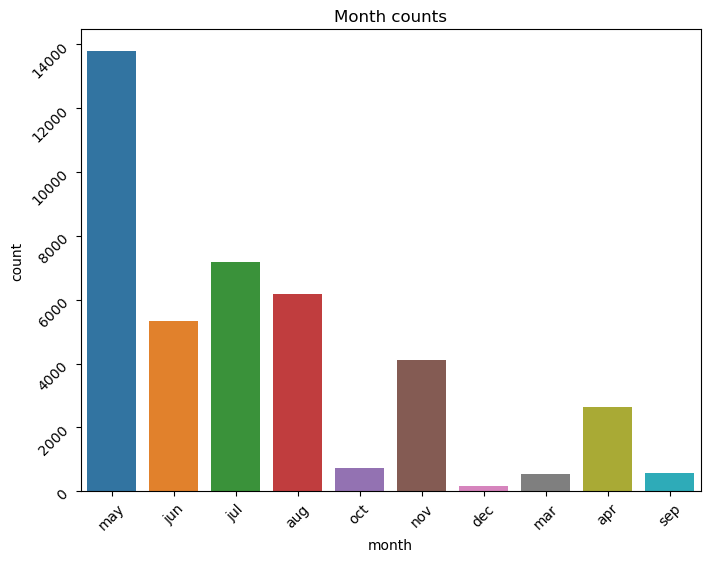

In [368]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="month")
ax.tick_params(labelrotation=45)
ax.set_title("Month counts")
plt.show()

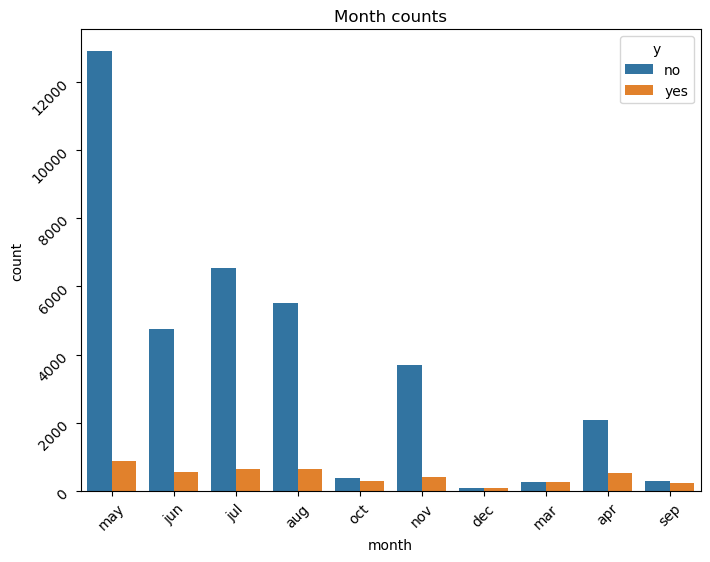

In [369]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="month", hue="y")
ax.tick_params(labelrotation=45)
ax.set_title("Month counts")
plt.show()

Not uniform distubutions. There might be something to uncover.

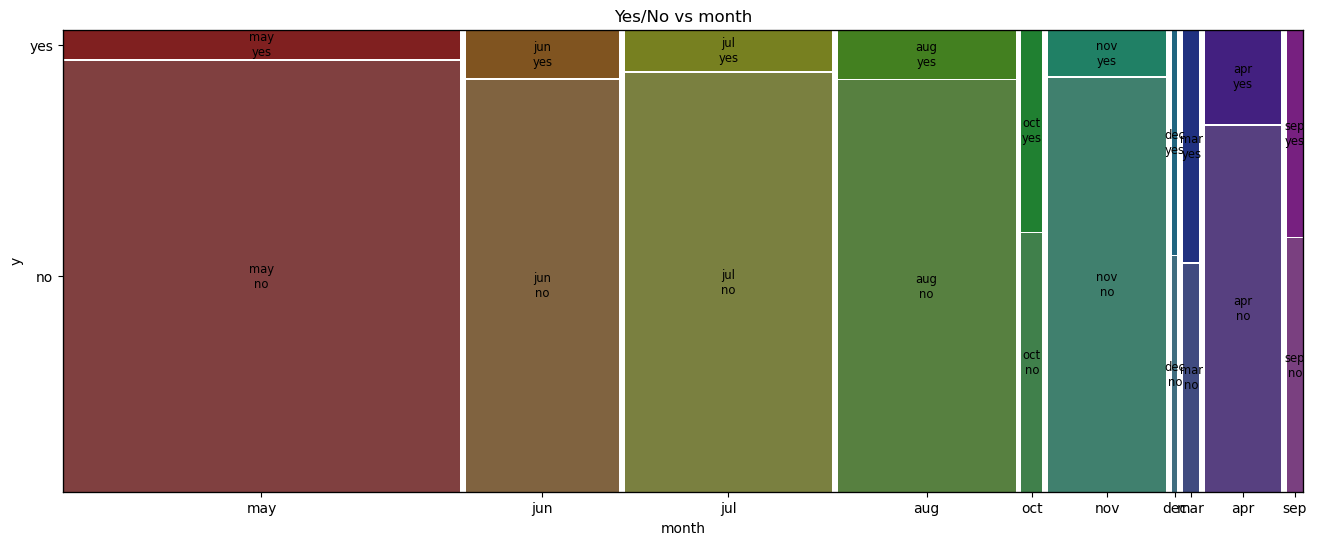

In [370]:
from statsmodels.graphics.mosaicplot import mosaic
df_to_plot = df[["month", "y"]]
df["y"] = df["y"].replace(1, "yes").replace(0, "no")
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel("month")
ax.set_ylabel("y")
mosaic(data=df, index=["month", "y"], title="Yes/No vs month", ax=ax)
plt.show()

Things to investigate:
- Why Oct, Dec, Mar, Sep have Yes's to No's ratio close to one?
- Why there is very little data regarding those months?
- What's with May?
- Why there is no data for January, February?

Answers
- Data gathered from May 2008 and June 2013, although no all records are present in the dataset used. The important fact is data for May and June is from 6 years (2008-2013), for other months it is 5 years.
- Financial crisis 2008 could be a factor, less contacts made after the crisis hit? <- From the plot above - crisis occured in October/November. Actually, worstening of the crisis ended in the end of 2008. (Nasdaq index had its low in December 2008, then upwards)
- Januray and February are not present because (domain knowledge) many companies tend not to do so - low ROIs <- This could explain also less data for March and April as well
- Month data and other factors could decide if the example to predict the answer to was affected by the crisis.
- High yes's to no's ratio for months for which there is very little data: It could be because calls were made to clients more probable to say yes. Tight budget because of the crisis meant less calls. However, it might not be true - the differece of calls made in months with low yes's to no's ration and months with high one is noticible. Is the difference of calls made before and after crisis so big? Or there is a general trend to make calls in certain months, like for Feb and Jan (already explained) 

## Day of week

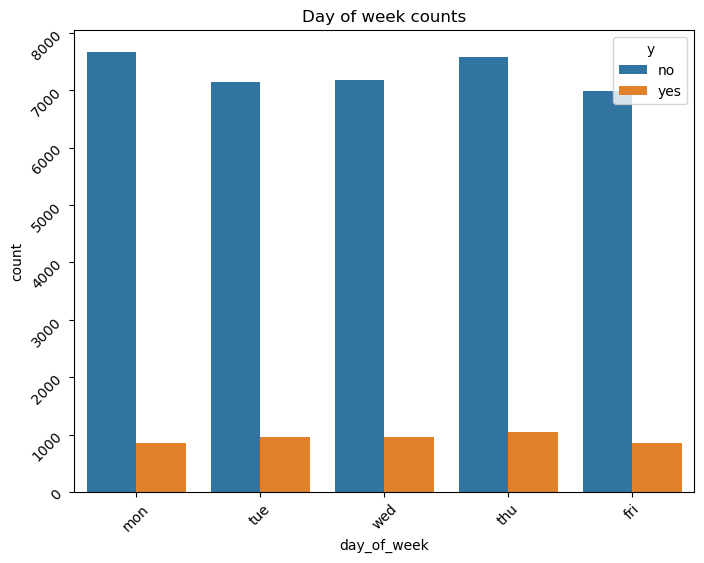

In [371]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="day_of_week", hue="y")
ax.tick_params(labelrotation=45)
ax.set_title("Day of week counts")
plt.show()

No pattern. Uniform distributions. Irrelevant.

## Duration

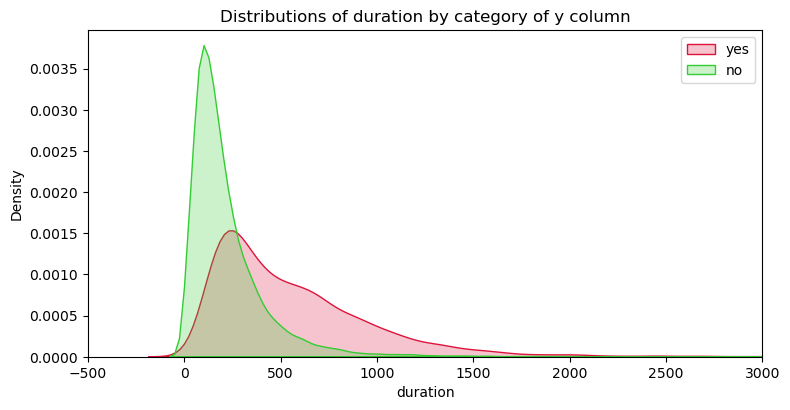

In [372]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim([-500, 3000])
sns.kdeplot(data=df[df["y"]=="yes"], x='duration', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='duration',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of duration by category of y column")
plt.show()

Pattern discussed in the data description part is observed - short calls are mostly no's.

In [373]:
df.groupby("y")["duration"].mean()

y
no     220.844807
yes    553.191164
Name: duration, dtype: float64

## Campaign

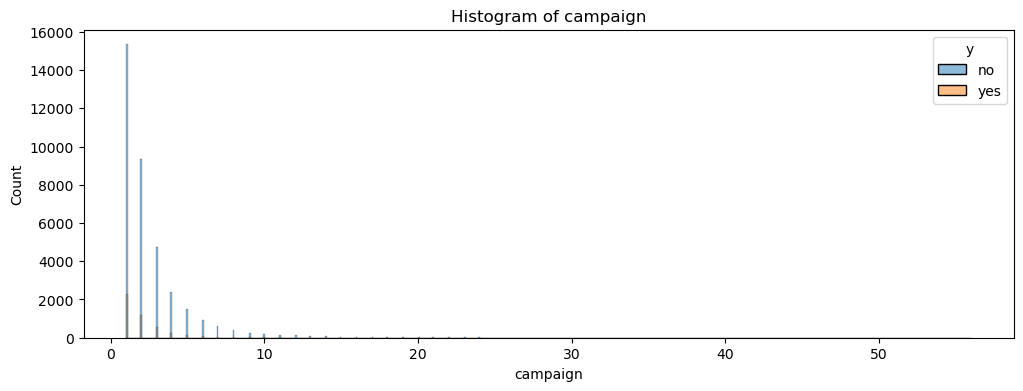

In [374]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.histplot(data=df, x='campaign', hue="y")
plt.title("Histogram of campaign")
plt.show()

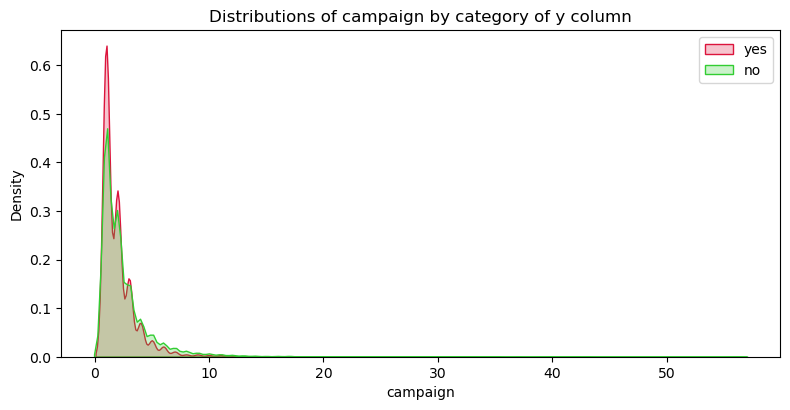

In [375]:
fig, ax = plt.subplots(figsize=(8, 4))
#ax.set_xlim([-500, 3000])
sns.kdeplot(data=df[df["y"]=="yes"], x='campaign', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='campaign',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of campaign by category of y column")
plt.show()

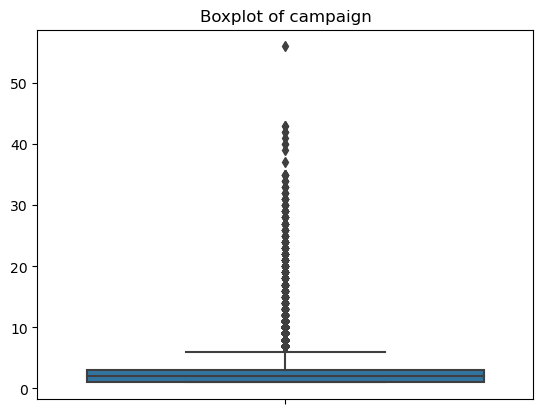

In [376]:
boxplot = sns.boxplot(df["campaign"])
boxplot.set(xticklabels=[])
boxplot.set(title="Boxplot of campaign")
plt.show()

In [377]:
df.groupby("campaign")["campaign"].count()

campaign
1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
15       51
16       51
17       58
18       33
19       26
20       30
21       24
22       17
23       16
24       15
25        8
26        8
27       11
28        8
29       10
30        7
31        7
32        4
33        4
34        3
35        5
37        1
39        1
40        2
41        1
42        2
43        2
56        1
Name: campaign, dtype: int64

A lot of outliers.

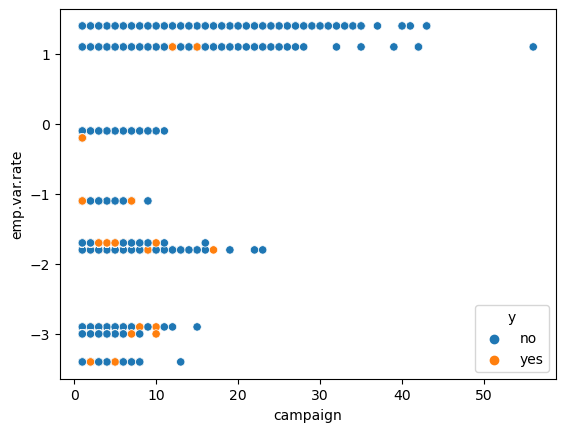

In [378]:
sns.scatterplot(x="campaign", y="emp.var.rate", hue="y", markers=["o", "x"], data=df)
plt.show()

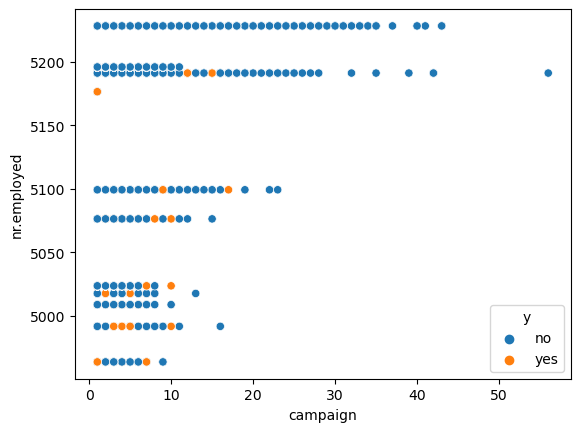

In [379]:
sns.scatterplot(x="campaign", y="nr.employed", hue="y", markers=["o", "x"], data=df)
plt.show()

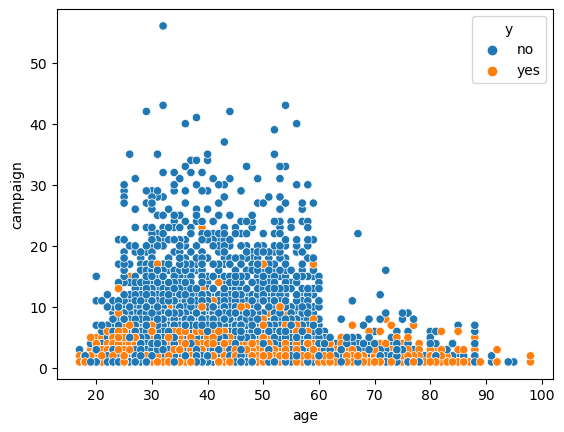

In [380]:
#sns.histplot(data=df, x='age')
sns.scatterplot(x="age", y="campaign", hue="y", markers=["o", "x"], data=df)
plt.show()

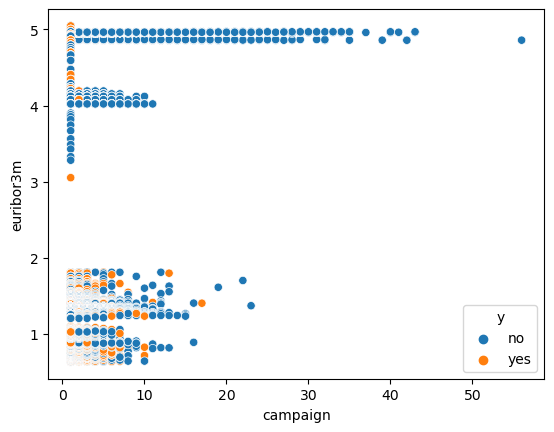

In [381]:
sns.scatterplot(x="campaign", y="euribor3m", hue="y", markers=["o", "x"], data=df)
plt.show()

## Number of days since the last contact (pdays)

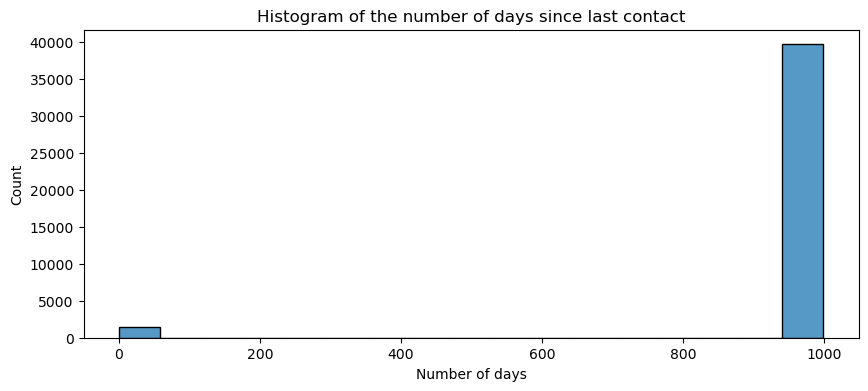

In [382]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data=df, x='pdays')
plt.title("Histogram of the number of days since last contact")
ax.set_xlabel("Number of days")
plt.show()

999 means client was not previously contacted, a new client. 

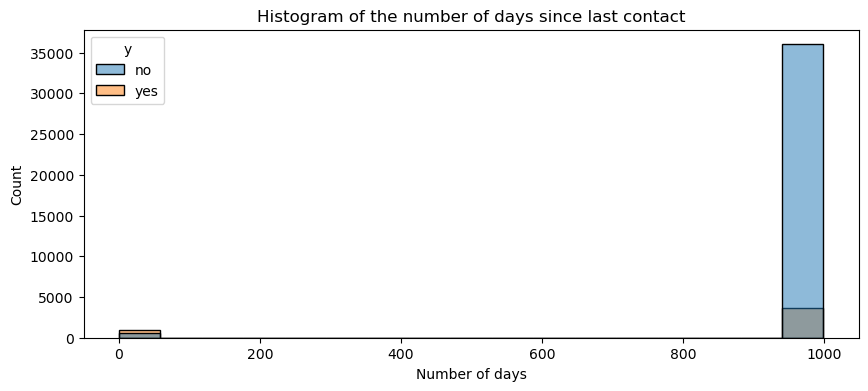

In [383]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data=df, x='pdays', hue="y")
plt.title("Histogram of the number of days since last contact")
ax.set_xlabel("Number of days")
plt.show()

In [384]:
x = df.groupby(["pdays", "y"])["y"].count().unstack(fill_value=0).stack()
x

pdays  y  
0      no         5
       yes       10
1      no        18
       yes        8
2      no        24
       yes       37
3      no       141
       yes      298
4      no        55
       yes       63
5      no        17
       yes       29
6      no       123
       yes      289
7      no        20
       yes       40
8      no         6
       yes       12
9      no        29
       yes       35
10     no        22
       yes       30
11     no        13
       yes       15
12     no        32
       yes       26
13     no         8
       yes       28
14     no         9
       yes       11
15     no         8
       yes       16
16     no         5
       yes        6
17     no         6
       yes        2
18     no         3
       yes        4
19     no         2
       yes        1
20     no         1
       yes        0
21     no         0
       yes        2
22     no         1
       yes        2
25     no         0
       yes        1
26     no         0
       ye

In [385]:
x.info()

<class 'pandas.core.series.Series'>
MultiIndex: 54 entries, (0, 'no') to (999, 'yes')
Series name: None
Non-Null Count  Dtype
--------------  -----
54 non-null     int64
dtypes: int64(1)
memory usage: 2.0+ KB


In [386]:
x = x.reset_index()
x.head()

,pdays,y,0
0,0,no,5
1,0,yes,10
2,1,no,18
3,1,yes,8
4,2,no,24


In [387]:
x.columns = ['pdays', 'y', 'count']
x.head()

,pdays,y,count
0,0,no,5
1,0,yes,10
2,1,no,18
3,1,yes,8
4,2,no,24


In [388]:
x = x.pivot_table(values='count', index=x.pdays, columns=['y'], aggfunc='first').reset_index()
x.head()

y,pdays,no,yes
0,0,5,10
1,1,18,8
2,2,24,37
3,3,141,298
4,4,55,63


In [389]:
x["ratio"] = x["yes"]/(x["yes"] + x["no"])
x

y,pdays,no,yes,ratio
0,0,5,10,0.666667
1,1,18,8,0.307692
2,2,24,37,0.606557
3,3,141,298,0.678815
4,4,55,63,0.533898
5,5,17,29,0.630435
6,6,123,289,0.701456
7,7,20,40,0.666667
8,8,6,12,0.666667
9,9,29,35,0.546875


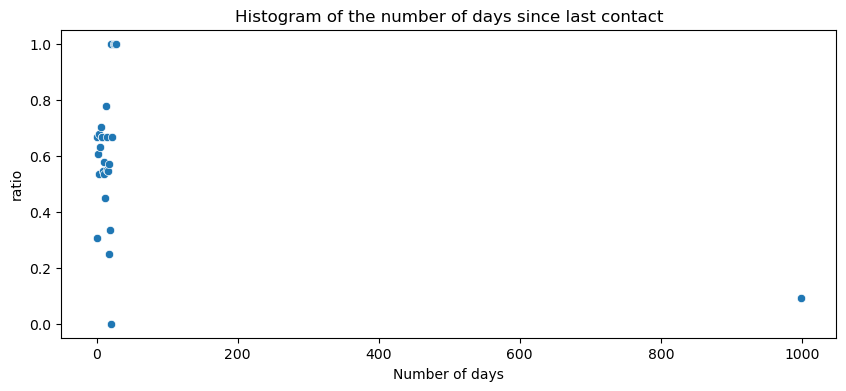

In [390]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(data=x, x='pdays', y="ratio")
plt.title("Histogram of the number of days since last contact")
ax.set_xlabel("Number of days")
plt.show()

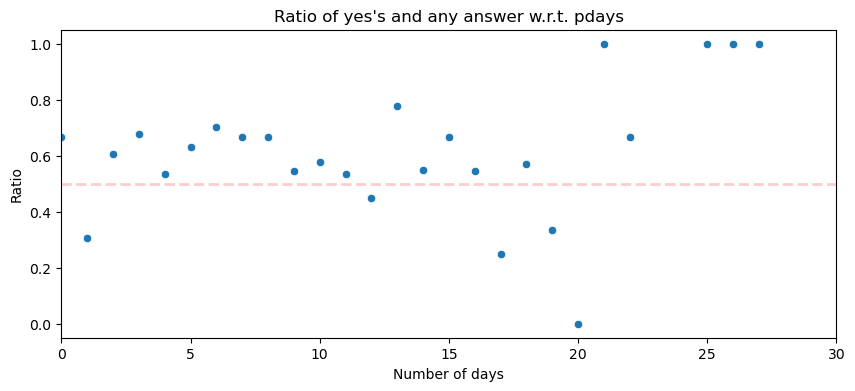

In [391]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim([0, 30])
sns.scatterplot(data=x, x='pdays', y="ratio")
ax.hlines(y=0.5, xmin=0, xmax=len(np.linspace(1, 21, 200)), colors='r', linestyles='--', lw=2, alpha=.2)
plt.title("Ratio of yes's and any answer w.r.t. pdays")
ax.set_xlabel("Number of days")
ax.set_ylabel("Ratio")
plt.show()

Regardless of the number of pdays, yes is more probable. If pdays=999 the opposite is true.

In [392]:
table = x
table["error"] = 1/table["yes"]
table

y,pdays,no,yes,ratio,error
0,0,5,10,0.666667,0.100000
1,1,18,8,0.307692,0.125000
2,2,24,37,0.606557,0.027027
3,3,141,298,0.678815,0.003356
4,4,55,63,0.533898,0.015873
5,5,17,29,0.630435,0.034483
6,6,123,289,0.701456,0.003460
7,7,20,40,0.666667,0.025000
8,8,6,12,0.666667,0.083333
9,9,29,35,0.546875,0.028571


In [393]:
table = table[table.error < 2]
table

y,pdays,no,yes,ratio,error
0,0,5,10,0.666667,0.100000
1,1,18,8,0.307692,0.125000
2,2,24,37,0.606557,0.027027
3,3,141,298,0.678815,0.003356
4,4,55,63,0.533898,0.015873
5,5,17,29,0.630435,0.034483
6,6,123,289,0.701456,0.003460
7,7,20,40,0.666667,0.025000
8,8,6,12,0.666667,0.083333
9,9,29,35,0.546875,0.028571


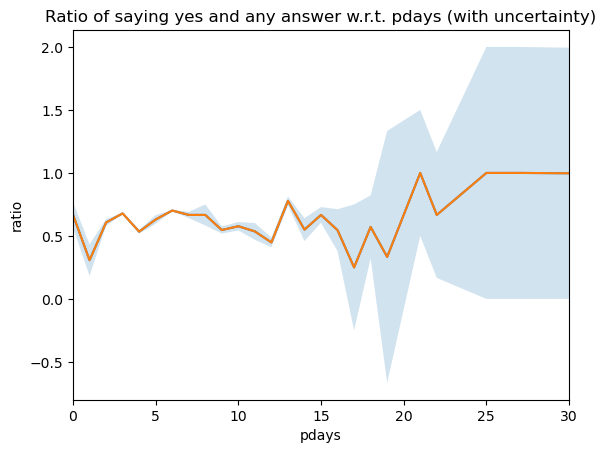

In [394]:
fig, ax = plt.subplots()
ax.set_xlim([0, 30])
ax.plot(table["pdays"], table["ratio"], '-')
ax.fill_between(table["pdays"], table["ratio"] - table["error"], table["ratio"] + table["error"], alpha=0.2)
ax.set_ylabel("ratio")
ax.set_xlabel("pdays")
ax.set_title("Ratio of saying yes and any answer w.r.t. pdays (with uncertainty)")
ax.plot(table["pdays"], table["ratio"])
plt.show()

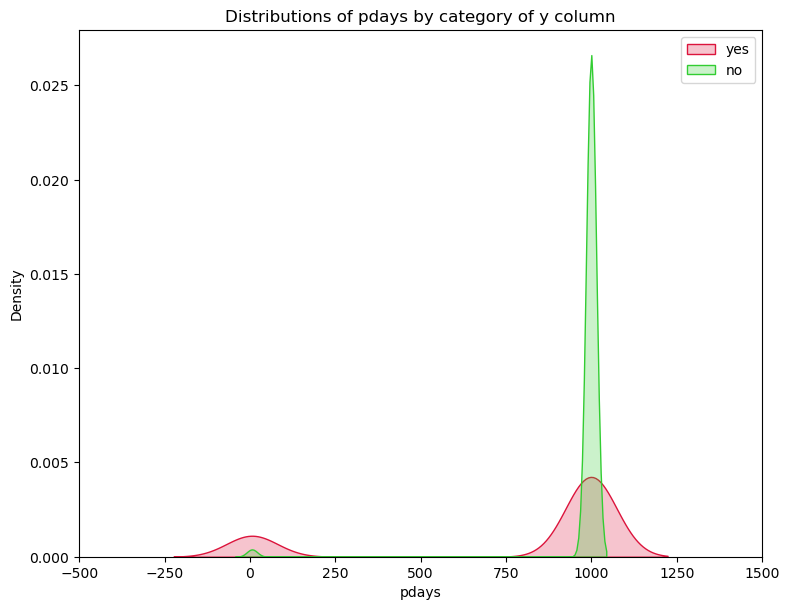

In [395]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim([-500, 1500])
sns.kdeplot(data=df[df["y"]=="yes"], x='pdays', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='pdays',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of pdays by category of y column")
plt.show()

Almost all "no" answers have pdays=999, for "yes" answer it is not clear. Knowing "no" answer, you can be certain pdays is 999, however knowing pdays is 999 you cannot be certain the answer is "no".

## Previous

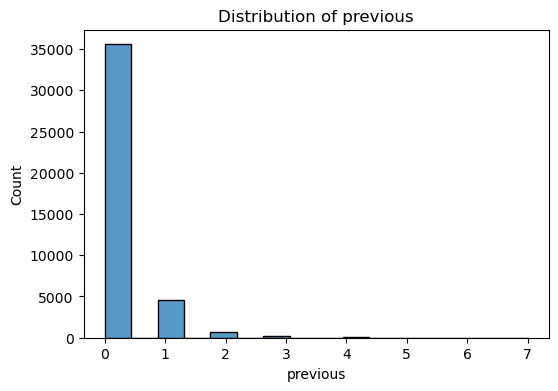

In [396]:
fig, ax = plt.subplots(figsize=[6,4])
sns.histplot(data=df, x='previous', bins=16)
plt.title("Distribution of previous")
plt.show()

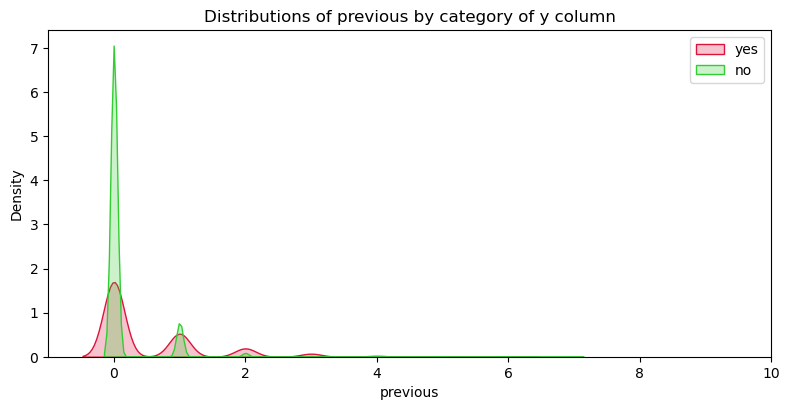

In [397]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim([-1, 10])
sns.kdeplot(data=df[df["y"]=="yes"], x='previous', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='previous',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of previous by category of y column")
plt.show()

## Outcome of previous the campaign (poutcome)

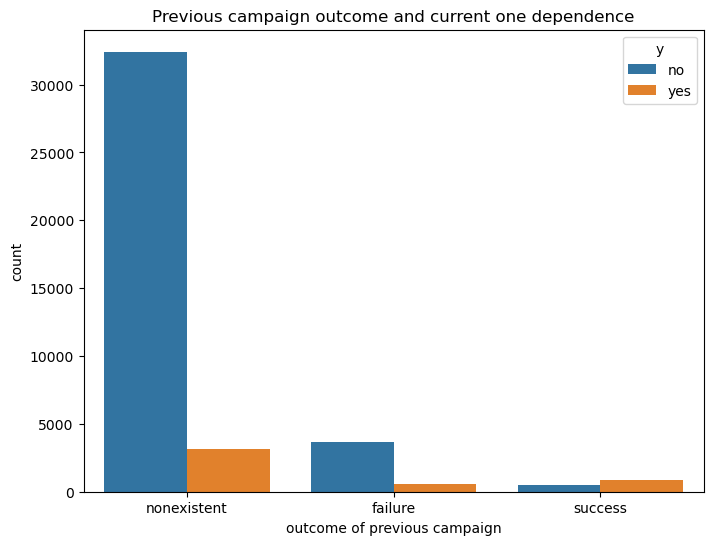

In [398]:
fig, ax = plt.subplots(figsize=[8, 6])
sns.countplot(data=df, x="poutcome", order=df["poutcome"].value_counts().index, hue="y")
ax.set_title("Previous campaign outcome and current one dependence")
ax.set_xlabel("outcome of previous campaign")
plt.show()

## Employment variation rate - quarterly indicator (emp.var.rate)

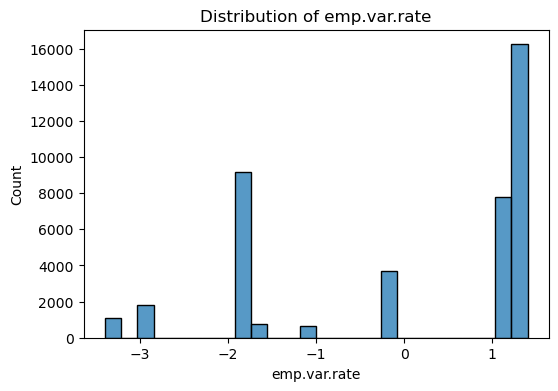

In [399]:
fig, ax = plt.subplots(figsize=[6,4])
sns.histplot(data=df, x='emp.var.rate')
plt.title("Distribution of emp.var.rate")
plt.show()

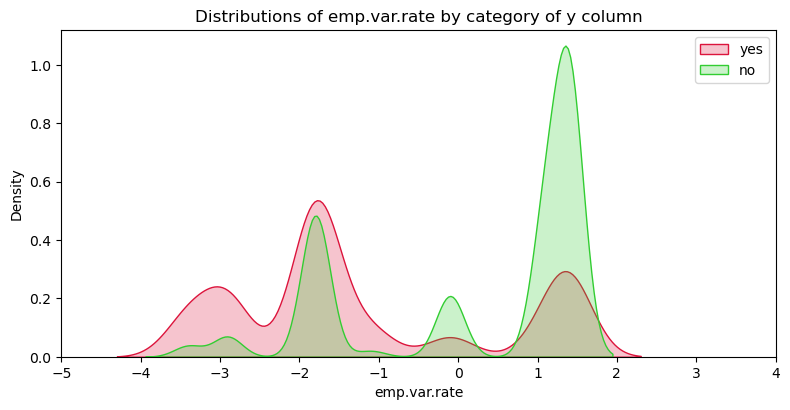

In [400]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim([-5, 4])
sns.kdeplot(data=df[df["y"]=="yes"], x='emp.var.rate', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='emp.var.rate',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of emp.var.rate by category of y column")
plt.show()

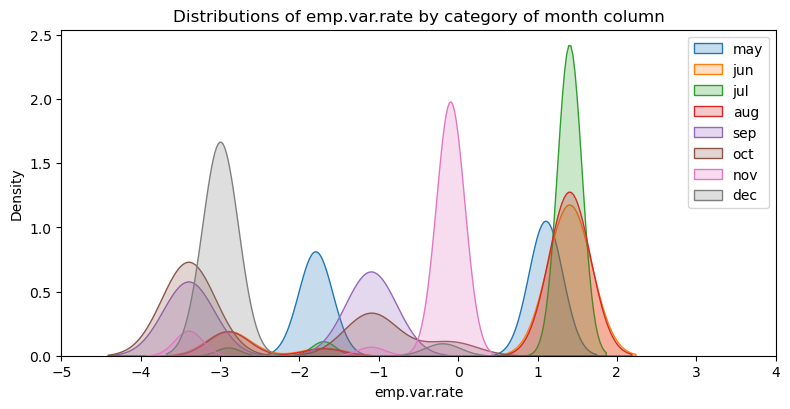

In [401]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim([-5, 4])
sns.kdeplot(data=df[df["month"]=="may"], x='emp.var.rate', label='may', fill=True, ax=ax)
sns.kdeplot(data=df[df["month"]=="jun"], x='emp.var.rate', label='jun', fill=True, ax=ax)
sns.kdeplot(data=df[df["month"]=="jul"], x='emp.var.rate', label='jul', fill=True, ax=ax)
sns.kdeplot(data=df[df["month"]=="aug"], x='emp.var.rate', label='aug', fill=True, ax=ax)
sns.kdeplot(data=df[df["month"]=="sep"], x='emp.var.rate', label='sep', fill=True, ax=ax)
sns.kdeplot(data=df[df["month"]=="oct"], x='emp.var.rate', label='oct', fill=True, ax=ax)
sns.kdeplot(data=df[df["month"]=="nov"], x='emp.var.rate', label='nov', fill=True, ax=ax)
sns.kdeplot(data=df[df["month"]=="dec"], x='emp.var.rate', label='dec', fill=True, ax=ax)
#sns.kdeplot(data=df[df["month"]=="mar"], x='emp.var.rate', label='mar', fill=True, ax=ax) # variance 0, cannot display the plot
#sns.kdeplot(data=df[df["month"]=="apr"], x='emp.var.rate', label='apr', fill=True, ax=ax) # variance 0, cannot display the plot
ax.legend()
plt.tight_layout()
plt.title("Distributions of emp.var.rate by category of month column")
plt.show()

## Consumer price index - monthly indicator (cons.price.idx)

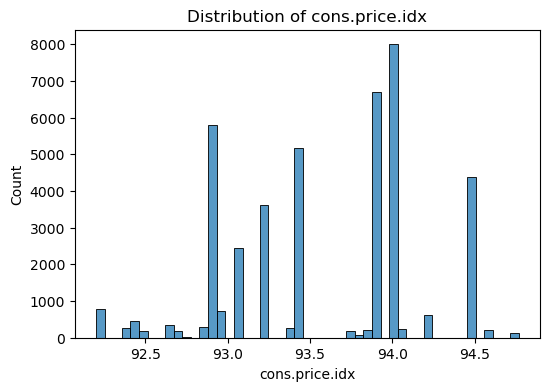

In [402]:
fig, ax = plt.subplots(figsize=[6,4])
sns.histplot(data=df, x='cons.price.idx')
plt.title("Distribution of cons.price.idx")
plt.show()

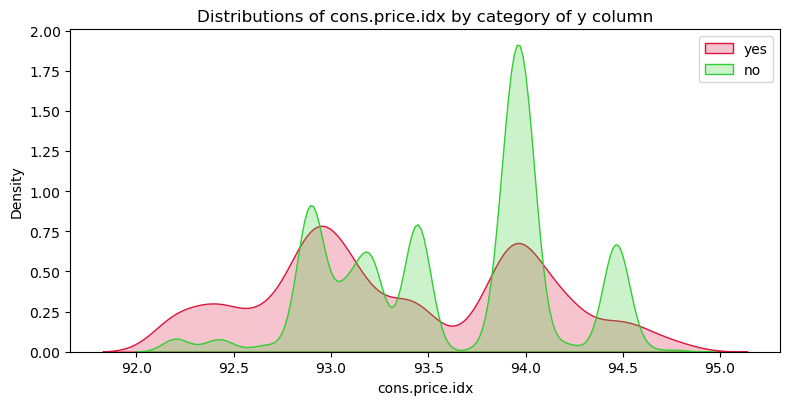

In [403]:
fig, ax = plt.subplots(figsize=(8, 4))
#ax.set_xlim([-5, 4])
sns.kdeplot(data=df[df["y"]=="yes"], x='cons.price.idx', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='cons.price.idx',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of cons.price.idx by category of y column")
plt.show()

## Consuper confidence index - monthly indicator (cons.conf.idx)

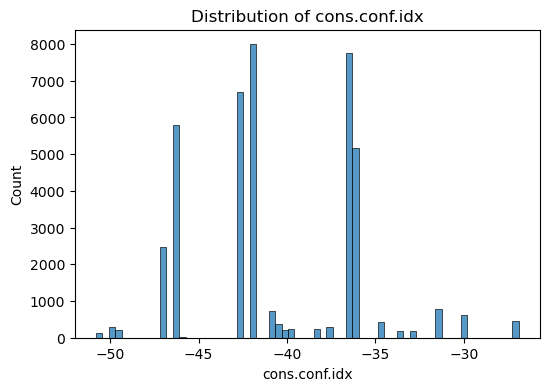

In [404]:
fig, ax = plt.subplots(figsize=[6,4])
sns.histplot(data=df, x='cons.conf.idx')
plt.title("Distribution of cons.conf.idx")
plt.show()

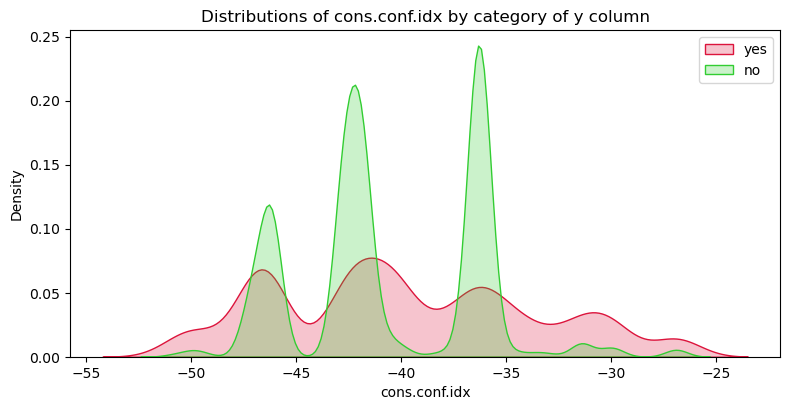

In [405]:
fig, ax = plt.subplots(figsize=(8, 4))
#ax.set_xlim([-5, 4])
sns.kdeplot(data=df[df["y"]=="yes"], x='cons.conf.idx', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='cons.conf.idx',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of cons.conf.idx by category of y column")
plt.show()

## Euribor 3 month rate - daily indicator (euribor3m)

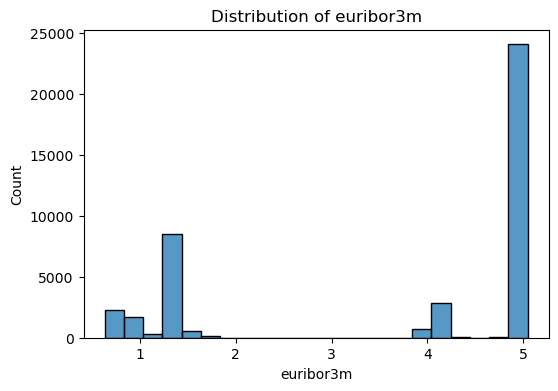

In [406]:
fig, ax = plt.subplots(figsize=[6,4])
sns.histplot(data=df, x='euribor3m')
plt.title("Distribution of euribor3m")
plt.show()

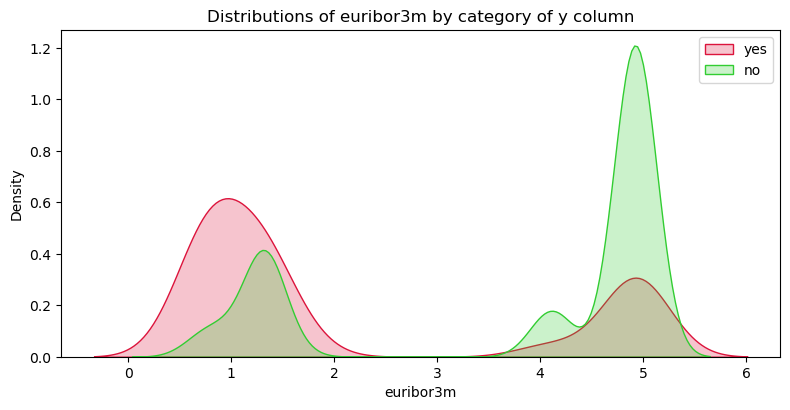

In [407]:
fig, ax = plt.subplots(figsize=(8, 4))
#ax.set_xlim([-5, 4])
sns.kdeplot(data=df[df["y"]=="yes"], x='euribor3m', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='euribor3m',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of euribor3m by category of y column")
plt.show()

## Number of employees - queterly indicator (nr.employed)

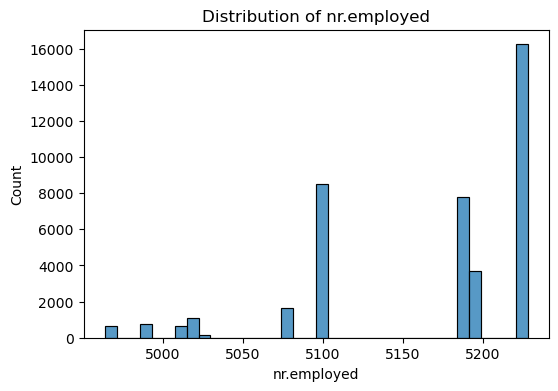

In [408]:
fig, ax = plt.subplots(figsize=[6,4])
sns.histplot(data=df, x='nr.employed')
plt.title("Distribution of nr.employed")
plt.show()

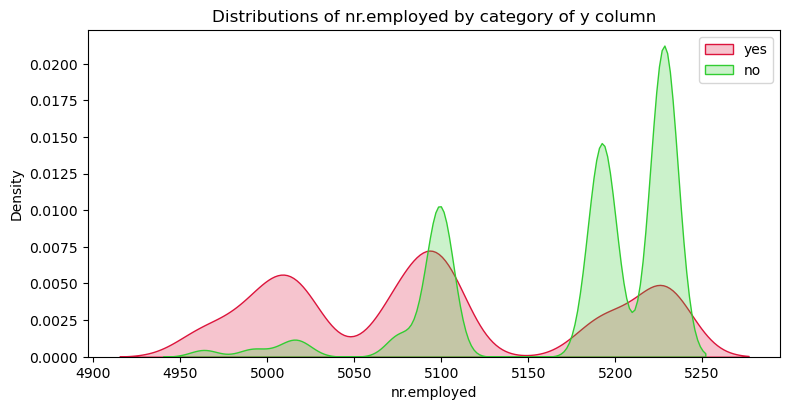

In [409]:
fig, ax = plt.subplots(figsize=(8, 4))
#ax.set_xlim([-5, 4])
sns.kdeplot(data=df[df["y"]=="yes"], x='nr.employed', 
            color='crimson', label='yes', fill=True, ax=ax)
sns.kdeplot(data=df[df["y"]=="no"], x='nr.employed',
            color='limegreen', label='no', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.title("Distributions of nr.employed by category of y column")
plt.show()